In [22]:
import os, sys
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Model

In [52]:
train_data = r"Fog\train"
test_data = r"Fog\test"

In [53]:
IMAGE_SIZE = [224, 224]
vgg = VGG16(include_top=False, weights='imagenet', input_shape=IMAGE_SIZE+[3])

In [54]:
for layer in vgg.layers:
    layer.trainable=False    

In [55]:
folders = r"Fog\train\*"

In [56]:
x = Flatten()(vgg.output)

In [57]:
prediction = Dense(len(folders), activation='sigmoid')(x)

model = Model(inputs=vgg.input, outputs=prediction)

In [58]:
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [59]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'], )

In [60]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [61]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory(r"D:\Freelancing\Vehicle YOLO\Fog\train",
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 173 images belonging to 2 classes.


In [62]:
test_set = test_datagen.flow_from_directory(r"D:\Freelancing\Vehicle YOLO\Fog\test",
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 72 images belonging to 2 classes.


In [63]:
model.fit(training_set, 
          validation_data=test_set,
          epochs=40,
          steps_per_epoch=len(training_set),
          validation_steps=len(test_set) )

Epoch 1/40
6/6 [==============================] - 8s 1s/step - loss: 1.2571 - accuracy: 0.5434 - val_loss: 0.3108 - val_accuracy: 0.8611
Epoch 2/40
6/6 [==============================] - 4s 635ms/step - loss: 0.2000 - accuracy: 0.9249 - val_loss: 0.1665 - val_accuracy: 0.9444
Epoch 3/40
6/6 [==============================] - 4s 708ms/step - loss: 0.1496 - accuracy: 0.9653 - val_loss: 0.1494 - val_accuracy: 0.9028
Epoch 4/40
6/6 [==============================] - 4s 714ms/step - loss: 0.1716 - accuracy: 0.9653 - val_loss: 0.1259 - val_accuracy: 0.9444
Epoch 5/40
6/6 [==============================] - 4s 726ms/step - loss: 0.1006 - accuracy: 0.9595 - val_loss: 0.1141 - val_accuracy: 0.9167
Epoch 6/40
6/6 [==============================] - 4s 624ms/step - loss: 0.0921 - accuracy: 0.9827 - val_loss: 0.1026 - val_accuracy: 0.9306
Epoch 7/40
6/6 [==============================] - 4s 746ms/step - loss: 0.0804 - accuracy: 0.9827 - val_loss: 0.0845 - val_accuracy: 0.9583
Epoch 8/40
6/6 [=======

In [64]:
r = model.fit(training_set, 
          validation_data=test_set,
          epochs=40,
          steps_per_epoch=len(training_set),
          validation_steps=len(test_set) )

Epoch 1/40
6/6 [==============================] - 4s 732ms/step - loss: 0.0359 - accuracy: 0.9884 - val_loss: 0.1030 - val_accuracy: 0.9583
Epoch 2/40
6/6 [==============================] - 4s 567ms/step - loss: 0.0383 - accuracy: 0.9884 - val_loss: 0.1653 - val_accuracy: 0.9583
Epoch 3/40
6/6 [==============================] - 4s 719ms/step - loss: 0.0178 - accuracy: 0.9942 - val_loss: 0.1253 - val_accuracy: 0.9306
Epoch 4/40
6/6 [==============================] - 4s 763ms/step - loss: 0.0385 - accuracy: 0.9942 - val_loss: 0.1154 - val_accuracy: 0.9306
Epoch 5/40
6/6 [==============================] - 5s 851ms/step - loss: 0.0203 - accuracy: 0.9942 - val_loss: 0.1162 - val_accuracy: 0.9306
Epoch 6/40
6/6 [==============================] - 4s 607ms/step - loss: 0.0127 - accuracy: 0.9942 - val_loss: 0.1552 - val_accuracy: 0.9444
Epoch 7/40
6/6 [==============================] - 4s 740ms/step - loss: 0.0242 - accuracy: 0.9942 - val_loss: 0.1092 - val_accuracy: 0.9583
Epoch 8/40
6/6 [====

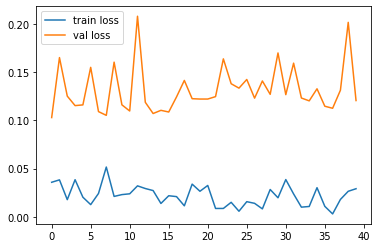

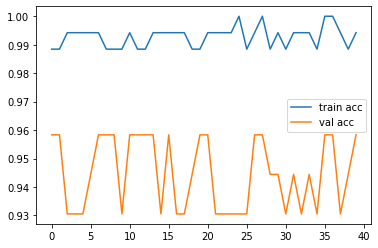

<Figure size 432x288 with 0 Axes>

In [66]:
import matplotlib.pyplot as plt
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [76]:
from tensorflow.keras.models import load_model

model.save(r'Fog\fog.h5')

In [77]:
#Predicting the images

In [78]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [79]:
model = load_model(r'Fog\fog.h5')

Enter path of your image:- D:\Freelancing\Vehicle YOLO\Fog\clear - Copy\taguig-metro-manila-philippines-nov-260nw-1849062778.jpg
1/1 [==============================] - 0s 24ms/step
Input image is clear.


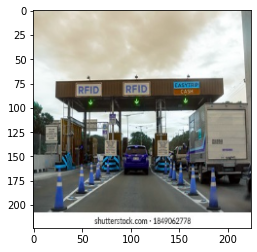

In [85]:
import cv2
img_size = 224
labels = ["clear","fog"]
image = input("Enter path of your image:- ")
image = cv2.imread(r"%s"%image)
image0 = cv2.resize(image, (224,224))
image = image0/255.0
image = image.reshape(-1, img_size, img_size, 3)
predict = model.predict(image)
predict = list(predict[0])
predict_name = labels[predict.index(max(predict))]
plt.imshow(image0)
#cv2.waitKey()
#cv2.destroyAllWindows()
print("Input image is %s."%predict_name)

Enter path of your image:- C:\Users\SBS05\Desktop\R\Untitled.png
1/1 [==============================] - 0s 21ms/step
Input image is clear.


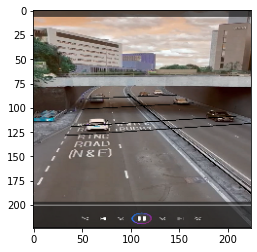

In [86]:
import cv2
img_size = 224
labels = ["clear","fog"]
image = input("Enter path of your image:- ")
image = cv2.imread(r"%s"%image)
image0 = cv2.resize(image, (224,224))
image = image0/255.0
image = image.reshape(-1, img_size, img_size, 3)
predict = model.predict(image)
predict = list(predict[0])
predict_name = labels[predict.index(max(predict))]
plt.imshow(image0)
#cv2.waitKey()
#cv2.destroyAllWindows()
print("Input image is %s."%predict_name)

Enter path of your image:- D:\Freelancing\Vehicle YOLO\Fog\sample\istockphoto-1055906130-612x612.jpg
1/1 [==============================] - 0s 22ms/step
Input image is fog.


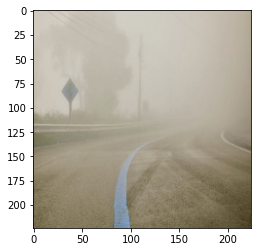

In [87]:
import cv2
img_size = 224
labels = ["clear","fog"]
image = input("Enter path of your image:- ")
image = cv2.imread(r"%s"%image)
image0 = cv2.resize(image, (224,224))
image = image0/255.0
image = image.reshape(-1, img_size, img_size, 3)
predict = model.predict(image)
predict = list(predict[0])
predict_name = labels[predict.index(max(predict))]
plt.imshow(image0)
#cv2.waitKey()
#cv2.destroyAllWindows()
print("Input image is %s."%predict_name)